In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
import scipy.stats as st
import pandas as pd
import random

Demuestre a través de simulación computacional que el Movimiento Browniano estándar posee incrementos normales e independientes $ \textbf{para todos los puntos del tiempo}$. Considere para ello un total de 10.000 trayectorias y 365 puntos en el tiempo igualmente espaciados. Construya los incrementos de forma secuencial.

In [2]:
trayectorias = 10000
puntos = 365
delta_t = 1/puntos
t = np.linspace(0,1,puntos+1)

###Movimiento Browniano Estandar

In [3]:
def MBEU(numTrayectorias, numPuntos):
  delta_t = 1/numPuntos
  mb = np.zeros((numTrayectorias, numPuntos+1))
  for i in range(numTrayectorias):
    for j in range(1, numPuntos+1):
      mb[i,j] = mb[i,j-1] + np.sqrt(delta_t) * np.random.normal(0, 1)
  return mb

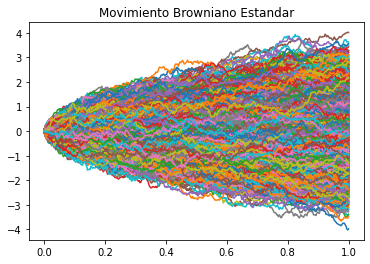

In [4]:
mb = MBEU(trayectorias,puntos)
for i in range(len(mb)):
  plt.plot(t, mb[i, :])
plt.title('Movimiento Browniano Estandar')
plt.show()

$\textbf{Incrementos Normales}$ \\
>Para probar que Bt tiene incrementos normales, calulamos numero m (muestras) de incrementos y por medio de jarque bera test encontrar el porcentaje de incrementos que siguen la distribución normal. Finalmente, comparar media y varianza teórica y práctica de estos incrementos

In [5]:
numero_muestras=10000
medias=[]
varianzas=[]
normales=0

for i in range(numero_muestras):
  tAleatorio= random.randrange(puntos+1)
  while tAleatorio==0:
    tAleatorio= random.randrange(puntos+1)
  if tAleatorio==1:
    sAleatorio=0
  else:
    sAleatorio= random.randrange(puntos+1)
    while sAleatorio >= tAleatorio:
      sAleatorio= random.randrange(puntos+1)
  
  Bt= mb[:,tAleatorio]
  Bs= mb[:,sAleatorio]
  Bts= Bt-Bs
  medias.append(np.mean(np.mean(Bts)))
  varianzas.append(np.abs(np.var(Bts)-(tAleatorio-sAleatorio)*delta_t)/(tAleatorio-sAleatorio)*delta_t)
  stat, prob= st.jarque_bera(Bts)
  if prob>0.05:
    normales+=1

print('En una muestra de',numero_muestras,'el procentaje de incrementos B_t-B_s normales es', normales*100/numero_muestras)
print('Con una media promedio de', np.mean(medias))
print('Y con un promedio en error relativo de la varianza de', np.mean(varianzas))

En una muestra de 10000 el procentaje de incrementos B_t-B_s normales es 93.08
Con una media promedio de 0.0015323571012358763
Y con un promedio en error relativo de la varianza de 8.455132894665048e-08


>Como se pudo evidenciar, para una muestra de 10.000, el porcentaje de incrementos normales es de un 93.08%, a demás se evidencia que la media promedio de estos incrementos es muy cercana a la teórica (0) y por último, se calculó un promedio del error relativo de la varianza de cada incremento, es decir, para cada incremento se calculó $|\frac{\text{varianza simulación - varianza teórica}}{\text{varianza teórica}}|$, arrojando como resultados un valor muy cercano a 0. Por ende, podemos concluir que tiene incrementos Normales.

>Posteriormente, tomamos un ejemplo particular y mostramos resultados gráficos

mu = -0.0035573647892358567
sigma^2 = 0.07690377029297017


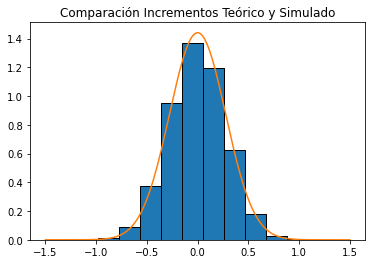

In [6]:
tAleatorio= random.randrange(puntos+1)
while tAleatorio==0:
  tAleatorio= random.randrange(puntos+1)
if tAleatorio==1:
  sAleatorio=0
else:
  sAleatorio= random.randrange(puntos+1)
  while sAleatorio >= tAleatorio:
    sAleatorio= random.randrange(puntos+1)
Bt= mb[:,tAleatorio]
Bs= mb[:,sAleatorio]

Bts= Bt-Bs

mu = np.mean(Bts) 
sigma = np.var(Bts, ddof=1)

print("mu =", mu)
print("sigma^2 =", sigma)
plt.hist(Bts, density=True, edgecolor='k') 

x_norm = np.linspace(-1.5, 1.5, 1000)
plt.plot(x_norm, st.norm.pdf(x_norm, 0, np.sqrt((tAleatorio - sAleatorio)*delta_t)))
plt.title('Comparación Incrementos Teórico y Simulado')
plt.show()

En el gráfico observamos la similitud que hay entre los Incrementos normales teóricos y simulados

$\textbf{Incrementos Independietes}$ \\
>Ahora, lo comprobamos por medio de la $\textbf{Proposicion I}$, si $f(h,B_{h(t)})$ es continua $\forall h_{t}= t$ y $E[B_s(B_t-B_s)]=0$ entonces tiene incrementos independiente

>Ahora, como f y h son funciones continuas, procedemos a calcular el valor esperado

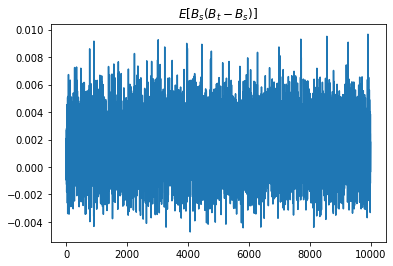

In [7]:
medias2=[]
for i in range(numero_muestras):
  #Para garantizar s<t:
  tAleatorio= random.randrange(puntos+1)
  while tAleatorio==0:
    tAleatorio= random.randrange(puntos+1)
  if tAleatorio==1:
    sAleatorio=0
  else:
    sAleatorio= random.randrange(puntos+1)
    while sAleatorio >= tAleatorio:
      sAleatorio= random.randrange(puntos+1)

  medias2.append(np.mean(mb[:,sAleatorio]* (mb[:,tAleatorio] - mb[:,sAleatorio])))

plt.plot(medias2)
plt.title("$E[B_s(B_t-B_s)]$")
plt.show()

>Para una muestra de 10.000 incrementos, podemos observar en la figura anterior que en cada una de las muestras, el valor esperado es cercano a cero y ninguno tiene valores lejanos de éste

>Por lo que podemos concluir que posee incrementos independientes